In [2]:
using CABLAB
using NetCDF

In [3]:
c=Cube("/Net/Groups/BGI/scratch/DataCube/v0.2.0/low-res")

CABLAB data cube at /Net/Groups/BGI/scratch/DataCube/v0.2.0/low-res
Spatial resolution:  1440x720 at 0.25 degrees.
Temporal resolution: 2001-01-01T00:00:00 to 2012-01-01T00:00:00 at 8daily time steps
Variables:           Rg aerosol_optical_thickness_1610 aerosol_optical_thickness_550 aerosol_optical_thickness_555 aerosol_optical_thickness_659 aerosol_optical_thickness_865 air_temperature_2m bare_soil_evaporation black_sky_albedo burnt_area c_emissions country_mask evaporation evaporative_stress fpar_fluxcom fractional_snow_cover gross_primary_productivity interception_loss land_surface_temperature latent_energy net_ecosystem_exchange open_water_evaporation ozone potential_evaporation precipitation root_moisture sensible_heat snow_sublimation snow_water_equivalent soil_moisture surface_moisture terrestrial_ecosystem_respiration transpiration water_mask water_vapour white_sky_albedo 


In [4]:
cdata=getCubeData(c,variable=["gross_primary_productivity","net_ecosystem_exchange","terrestrial_ecosystem_respiration"])

Data Cube view with the following dimensions
Lon                 Axis with 1440 Elements from -180.0 to 179.75
Lat                 Axis with 720 Elements from 90.0 to -89.75
Time                Axis with 506 Elements from 2001-01-01T00:00:00 to 2011-12-27T00:00:00
Variable            Axis with elements: gross_primary_productivity net_ecosystem_exchange terrestrial_ecosystem_respiration 


In [5]:
el=ncread("../NoteBooks/ETOPO1.nc","ETOPO1avg")
elc=CubeMem(CubeAxis[cdata.lonAxis,cdata.latAxis],el,zeros(UInt8,1440,720))

In-Memory data cube with the following dimensions
Lon                 Axis with 1440 Elements from -180.0 to 179.75
Lat                 Axis with 720 Elements from 90.0 to -89.75


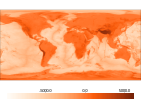

In [6]:
plotMAP(elc)

In [7]:
function clusterPoint(xin,clusterBounds)
    f=findfirst(i->xin<i,clusterBounds)
    f==0 ? length(clusterBounds)+1 :  f
end
clusterBounds=[0.0,100.0,250.0,500.0,1000.0,2500.0,5000.0]
clusterAx=CategoricalAxis("HeightClass",[map(s->string("<",s,"m"),clusterBounds);">$(clusterBounds[end])"])
elc2=CubeMem(CubeAxis[cdata.lonAxis,cdata.latAxis],clusterPoint.(el,[clusterBounds]),zeros(UInt8,1440,720))

In-Memory data cube with the following dimensions
Lon                 Axis with 1440 Elements from -180.0 to 179.75
Lat                 Axis with 720 Elements from 90.0 to -89.75


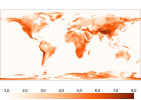

In [8]:
plotMAP(elc2)

In [9]:
using OnlineStats
@time sstat=mapCube(Mean,cdata,by=(elc2,VariableAxis),outAxis=clusterAx)

 56.736636 seconds (79.27 M allocations: 9.003 GB, 3.17% gc time)


In-Memory data cube with the following dimensions
HeightClass         Axis with elements: <0.0m <100.0m <250.0m <500.0m <1000.0m <2500.0m <5000.0m >5000.0 
Variable            Axis with elements: gross_primary_productivity net_ecosystem_exchange terrestrial_ecosystem_respiration 


In [14]:
plotXY(sstat,xaxis="height",group="var")

In [12]:
import Patchwork
Patchwork.load_js_runtime()